In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Import StockMock csv
stockmock_data = pd.read_csv('/home/blackrose/Downloads/Long Straddle (Stock Mock Backtest Index Strategies) (2).csv').dropna()

In [54]:
# Get rid of rows with nonsense values in them
stockmock_data = stockmock_data[stockmock_data['Profit'] != 'Profit']

In [55]:
# Convert profit values into numeric values i.e. floating point numbers
stockmock_data['Profit'] = stockmock_data['Profit'].apply(float)

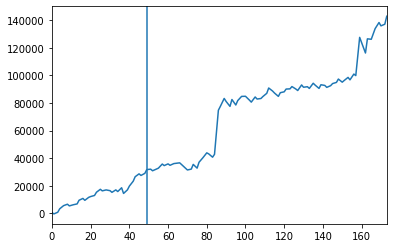

In [56]:
# Plot cumulative PnL curve
stockmock_data['Profit'].cumsum().plot()
plt.axvline(49)

In [57]:
# Print final PnL
stockmock_data['Profit'].cumsum().iloc[-1]

142875.0

In [58]:
stockmock_data.columns

Index(['Date', 'Profit', 'Spot Change', 'Sell 20 ATM+100 PE',
       'Sell 20 ATM-100 CE'],
      dtype='object')

In [63]:
stockmock_data.columns[4]

'Sell 20 ATM-100 CE'

In [64]:
# Extract CE and PE Entry, Exit prices from the dataframe into new columns
stockmock_data['CE Entry'] = stockmock_data['Sell 20 ATM-100 CE'].apply(lambda x: x.split('(')[1].split('-')[0])
stockmock_data['CE Exit'] = stockmock_data['Sell 20 ATM-100 CE'].apply(lambda x: x.split('(')[1].split('-')[1].split('=')[0])
stockmock_data['PE Entry'] = stockmock_data['Sell 20 ATM+100 PE'].apply(lambda x: x.split('(')[1].split('-')[0])
stockmock_data['PE Exit'] = stockmock_data['Sell 20 ATM+100 PE'].apply(lambda x: x.split('(')[1].split('-')[1].split('=')[0])

In [65]:
# Convert CE/PE Entry, Exit values into numerical values i.e. floating point numbers
stockmock_data[['CE Entry', 'CE Exit', 'PE Entry', 'PE Exit']] = stockmock_data[['CE Entry', 'CE Exit', 'PE Entry', 'PE Exit']].applymap(float)

In [66]:
# Compute Slippage
stockmock_data['Slippage'] = stockmock_data[['CE Entry', 'CE Exit', 'PE Entry', 'PE Exit']].sum(axis=1)*0.01*20

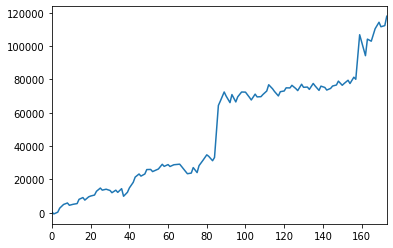

In [67]:
# Display Net cumulative PnL i.e. Profit - Slippage
(stockmock_data['Profit'] - stockmock_data['Slippage']).cumsum().plot()

In [68]:
# Diplay final Net Profit
np = (stockmock_data['Profit'] - stockmock_data['Slippage']).cumsum().iloc[-1]
print(np)

117951.50200000001


In [69]:
stockmock_data['Net Profit'] = (stockmock_data['Profit'] - stockmock_data['Slippage'])

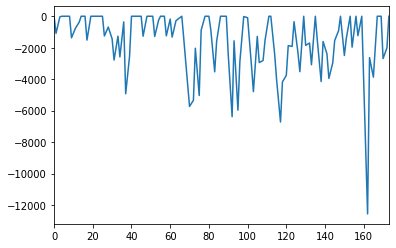

In [70]:
(stockmock_data['Net Profit'].cumsum() - stockmock_data['Net Profit'].cumsum().cummax()).plot()

In [71]:
mdd = (stockmock_data['Net Profit'].cumsum() - stockmock_data['Net Profit'].cumsum().cummax()).min()

In [72]:
mdd

-12568.661999999997

In [73]:
abs(np/mdd)

9.384571086405222

In [74]:
(np.ceil(((76000/2.5)*2 + abs(mdd*2))/10000)*10000)*1.5

AttributeError: 'numpy.float64' object has no attribute 'ceil'